# 11장. 회귀분석

## 11.2 단순회귀분석
### 분석 시나리오

A 쇼핑의 방문빈도와 총 매출액 의 인과관계를 회귀분석을 통해 살펴보자. 이에 대한 귀무가설과 연구가설은 다음과 같이 정의할 수 있다.

#### H0 (귀무가설)= 방문빈도는 총 매출액에 영향을 미치지 않는다.
#### H1 (연구가설)= 방문빈도는 총 매출액에 영향을 미친다. 


In [1]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import statsmodels.formula.api as smf
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#2. 단순회귀분석 실행하기
model1 = smf.ols(formula = '총_매출액 ~ 방문빈도', data = df).fit( )
model1.summary( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     660.8
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          3.05e-112
Time:                        22:57:23   Log-Likelihood:                -16921.
No. Observations:                1000   AIC:                         3.385e+04
Df Residuals:                     998   BIC:                         3.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.572e+06   2.74e+05      5.743      0.000    1.03e+06    2.11e+06
방문빈도        2.066e+05   8037.616     25.707      0.000    1.91e+05    2.22e+05
==============================================================================
Omnibus:                      684.213   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17231.472
Skew:                           2.760   Prob(JB):                         0.00
Kurtosis:                      22.573   Cond. No.                         54.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 206622.163 1572126.981]
 
2.066e+05 x + 1.572e+06


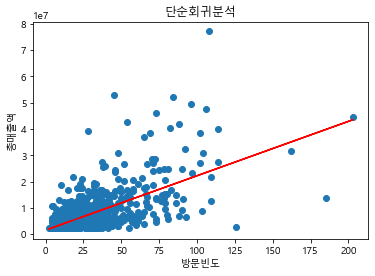

In [2]:
#1. 모듈 탑재
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

#2. 한글깨짐현상 방지 
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 

#3. 선형회귀선 구하기
fit = np.polyfit(df['방문빈도'], df['총_매출액'],1)
fit_fn = np.poly1d(fit)
print(np.round(fit,3))
print(fit_fn)

#4. 산점도와 선형회귀선 그리기
%matplotlib inline
plt.title('단순회귀분석') #차트 제목
plt.xlabel('방문빈도') # X축 이름
plt.ylabel('총매출액') # Y축 이름
plt.plot(df['방문빈도'], df['총_매출액'],'o')
plt.plot(df['방문빈도'], fit_fn(df['방문빈도']), 'r')

## 11.3 다중회귀분석
### 분석 시나리오

A쇼핑 데이터에서 서비스만족도, 방문빈도, 구매카테고리 수가 총 매출액에 미치는 영향을 다중회귀분석을 통해 살펴보자. 

#### H0 (귀무가설)= 서비스 만족도, 방문횟수, 구매카테고리 수는 총 매출액에 영향을 미치지 않는다.
#### H1 (연구가설)= 서비스 만족도, 방문횟수, 구매카테고리 수는 총 매출액에 영향을 미친다.


In [3]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#2. 다중회귀분석 실행
model2 = smf.ols(formula = '총_매출액 ~ 서비스_만족도 + 방문빈도 + 구매_카테고리_수', data = df).fit()
print(model2.summary())

#3. 다중공선성 확인하기
y, X = dmatrices('총_매출액 ~ 서비스_만족도 + 방문빈도 + 구매_카테고리_수', data=df, return_type = 'dataframe')
print(np.round(variance_inflation_factor(X.values, 1),3)) #서비스만족도 VIF 값
print(np.round(variance_inflation_factor(X.values, 2),3)) #방문빈도 VIF 값
print(np.round(variance_inflation_factor(X.values, 3),3)) #구매 카테고리수 VIF 값


                            OLS Regression Results                            
Dep. Variable:                  총_매출액   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     230.8
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.19e-113
Time:                        22:57:23   Log-Likelihood:                -16911.
No. Observations:                1000   AIC:                         3.383e+04
Df Residuals:                     996   BIC:                         3.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.033e+06   1.01e+06      2.009      0.0

## 11.4 더미변수를 이용한 회귀분석 
### 분석 시나리오

A쇼핑 데이터에서 구매유형이라는 범주형 데이터를 더미변수화하여 방문빈도를 예측하는 회귀모형을 만들어보자. 

#### H0 (귀무가설)= 각각의 구매유형은 총 매출액에 영향을 미치지 않는다.
#### H1 (연구가설)= 각각의 구매유형은 총 매출액에 영향을 미친다.


In [4]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import statsmodels.formula.api as smf
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

#2. 더미변수 생성
df2=pd.get_dummies(df['구매유형'], prefix='구매유형', drop_first=True)
df3=pd.concat([df,df2],axis=1)
print(df2)

#3. 더미변수를 이용한 회귀분석
Model3 = smf.ols(formula = '방문빈도 ~ 구매유형_2 + 구매유형_3  + 구매유형_4', data = df3).fit( )
Model3.summary()


     구매유형_2  구매유형_3  구매유형_4
0         0       0       1
1         0       0       1
2         0       0       1
3         0       0       1
4         1       0       0
..      ...     ...     ...
995       0       1       0
996       1       0       0
997       0       0       1
998       0       1       0
999       0       0       1

[1000 rows x 3 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   방문빈도   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          8.42e-122
Time:                        22:57:23   Log-Likelihood:                -4193.5
No. Observations:                1000   AIC:                             8395.
Df Residuals:                     996   BIC:                             8415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0233      2.450      4.092      0.000       5.216      14.830
구매유형_2        36.9736      2.611     14.163      0.000      31.851      42.096
구매유형_3         7.3517      2.792      2.634      0.009       1.874      12.830
구매유형_4         7.6602      2.554      3.000      0.003       2.649      12.671
==============================================================================
Omnibus:                      754.728   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18540.829
Skew:                           3.215   Prob(JB):                         0.00
Kurtosis:                      23.091   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""